<a href="https://colab.research.google.com/github/Guchigbu/dsddd/blob/main/Corrected_Autoregression_Time_series_Analysis_for_NATIONHOOD_and_DEMOCRACY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This code page contains the autogression analysis (and its dataset) conducted for NATIONHOOD (Chapter Four) and DEMOCRACY (Chapter Six) of the this: METAPHORICAL CONCEPTUALISATION OF NATIONHOOD AND
#DEMOCRACY IN NIGERIAN POLITICAL DISCOURSE (1960-2024)

AR(1) MODEL RESULTS
                            OLS Regression Results                            
Dep. Variable:               Metaphor   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     7.297
Date:                Mon, 07 Jul 2025   Prob (F-statistic):            0.00889
Time:                        12:58:19   Log-Likelihood:                -165.21
No. Observations:                  64   AIC:                             334.4
Df Residuals:                      62   BIC:                             338.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4371      0.472

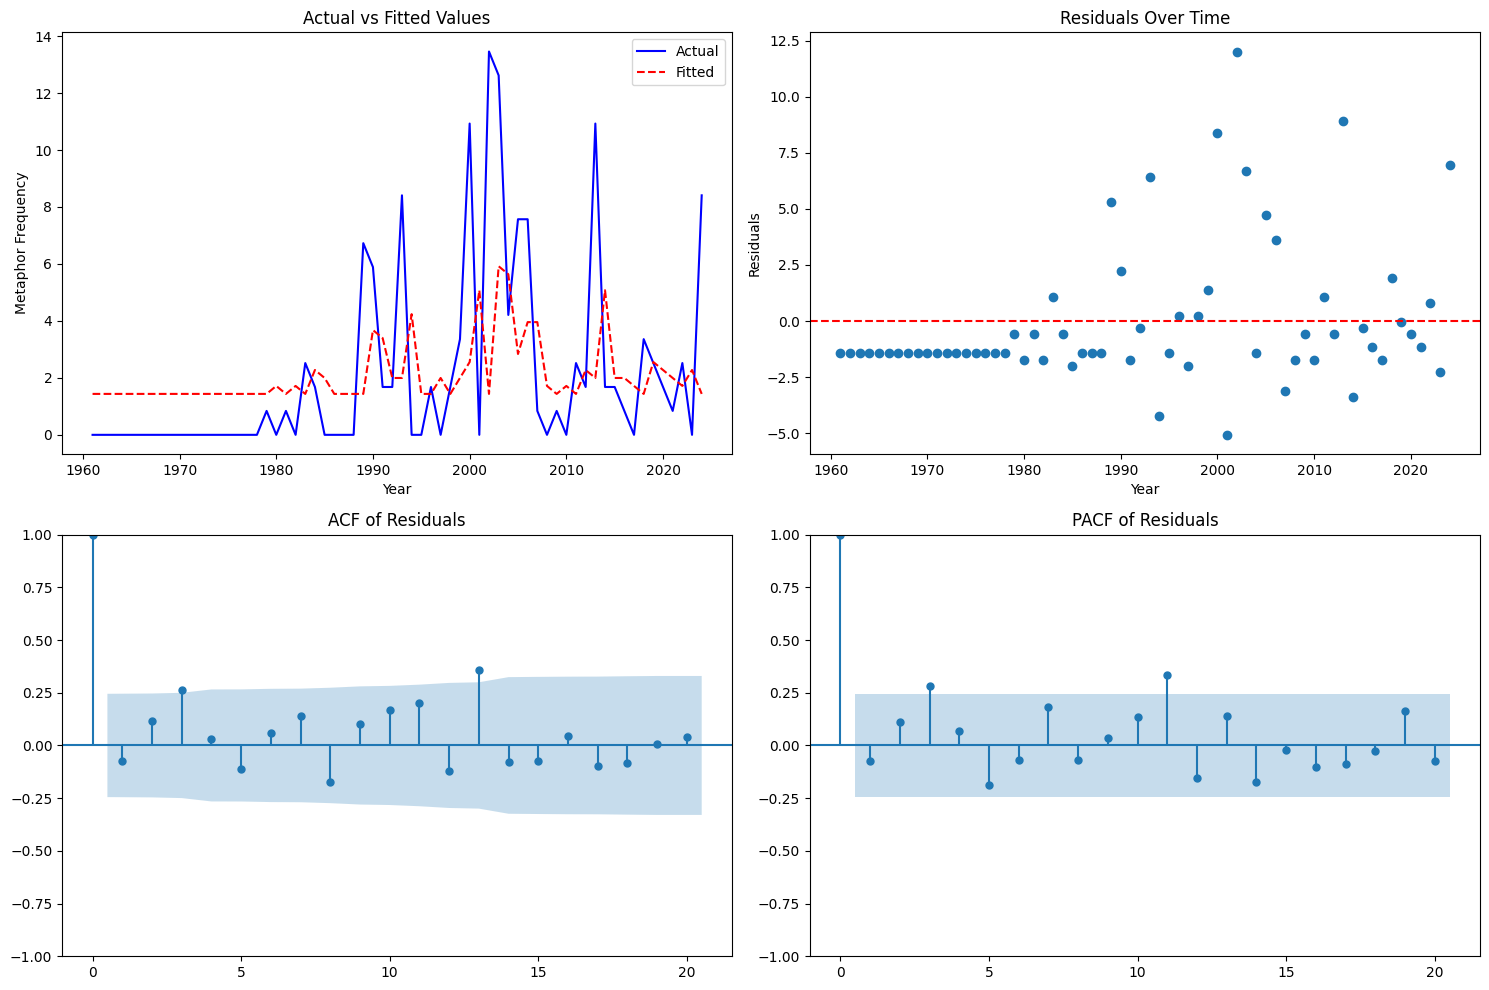

<Figure size 600x600 with 0 Axes>

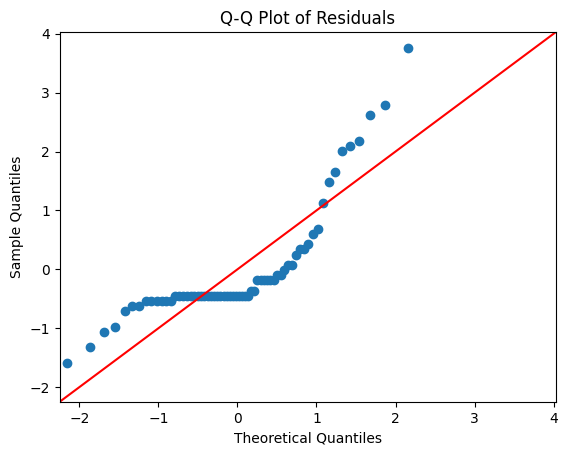

In [ ]:
#correct time series for PERSON (DEMOCRACY) (Chapter six)


import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    'Year': range(1960, 2025),
    'Metaphor': [
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.84,
        0.00, 0.84, 0.00, 2.52, 1.68, 0.00, 0.00, 0.00, 0.00, 6.73,
        5.89, 1.68, 1.68, 8.41, 0.00, 0.00, 1.68, 0.00, 1.68, 3.36,
        10.93, 0.00, 13.46, 12.62, 4.21, 7.57, 7.57, 0.84, 0.00, 0.84,
        0.00, 2.52, 1.68, 10.93, 1.68, 1.68, 0.84, 0.00, 3.36, 2.52,
        1.68, 0.84, 2.52, 0.00, 8.41
    ]
}

df = pd.DataFrame(data)

# Create lagged variable
df['Lag1'] = df['Metaphor'].shift(1)

# Drop the first row (NA due to lagging)
df = df.dropna()

# Fit AR(1) model
X = sm.add_constant(df['Lag1'])  # Add intercept
model = sm.OLS(df['Metaphor'], X)
results = model.fit()

# Model summary
print("="*50)
print("AR(1) MODEL RESULTS")
print("="*50)
print(results.summary())
print("\n")

# Residual diagnostics
residuals = results.resid

# Normality test (Shapiro-Wilk)
shapiro_test = stats.shapiro(residuals)
print("="*50)
print("RESIDUAL NORMALITY TEST")
print("="*50)
print(f"Shapiro-Wilk test: W = {shapiro_test[0]:.3f}, p = {shapiro_test[1]:.3f}")
if shapiro_test[1] > 0.05:
    print("Residuals are normally distributed (p > 0.05)")
else:
    print("Residuals are NOT normally distributed (p ≤ 0.05)")
print("\n")

# Autocorrelation tests
print("="*50)
print("RESIDUAL AUTOCORRELATION TESTS")
print("="*50)
print("Ljung-Box Test (Q-statistic):")
lb_test = acorr_ljungbox(residuals, lags=[5, 10], return_df=True)
print(lb_test)
print("\n")

# Visualization
plt.figure(figsize=(15, 10))

# 1. Time series plot
plt.subplot(2, 2, 1)
plt.plot(df['Year'], df['Metaphor'], 'b-', label='Actual')
plt.plot(df['Year'], results.fittedvalues, 'r--', label='Fitted')
plt.title('Actual vs Fitted Values')
plt.xlabel('Year')
plt.ylabel('Metaphor Frequency')
plt.legend()

# 2. Residual plot
plt.subplot(2, 2, 2)
plt.scatter(df['Year'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Year')
plt.ylabel('Residuals')

# 3. ACF plot
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF of Residuals')

# 4. PACF plot
plt.subplot(2, 2, 4)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

# Additional diagnostic: QQ plot
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

AR(1) MODEL RESULTS
                                  OLS Regression Results                                  
Dep. Variable:     PERCENTAGE OF JOURNEY METAPHOR   R-squared:                       0.006
Model:                                        OLS   Adj. R-squared:                 -0.010
Method:                             Least Squares   F-statistic:                    0.3884
Date:                            Sat, 16 Aug 2025   Prob (F-statistic):              0.535
Time:                                    05:16:53   Log-Likelihood:                -17.669
No. Observations:                              64   AIC:                             39.34
Df Residuals:                                  62   BIC:                             43.66
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

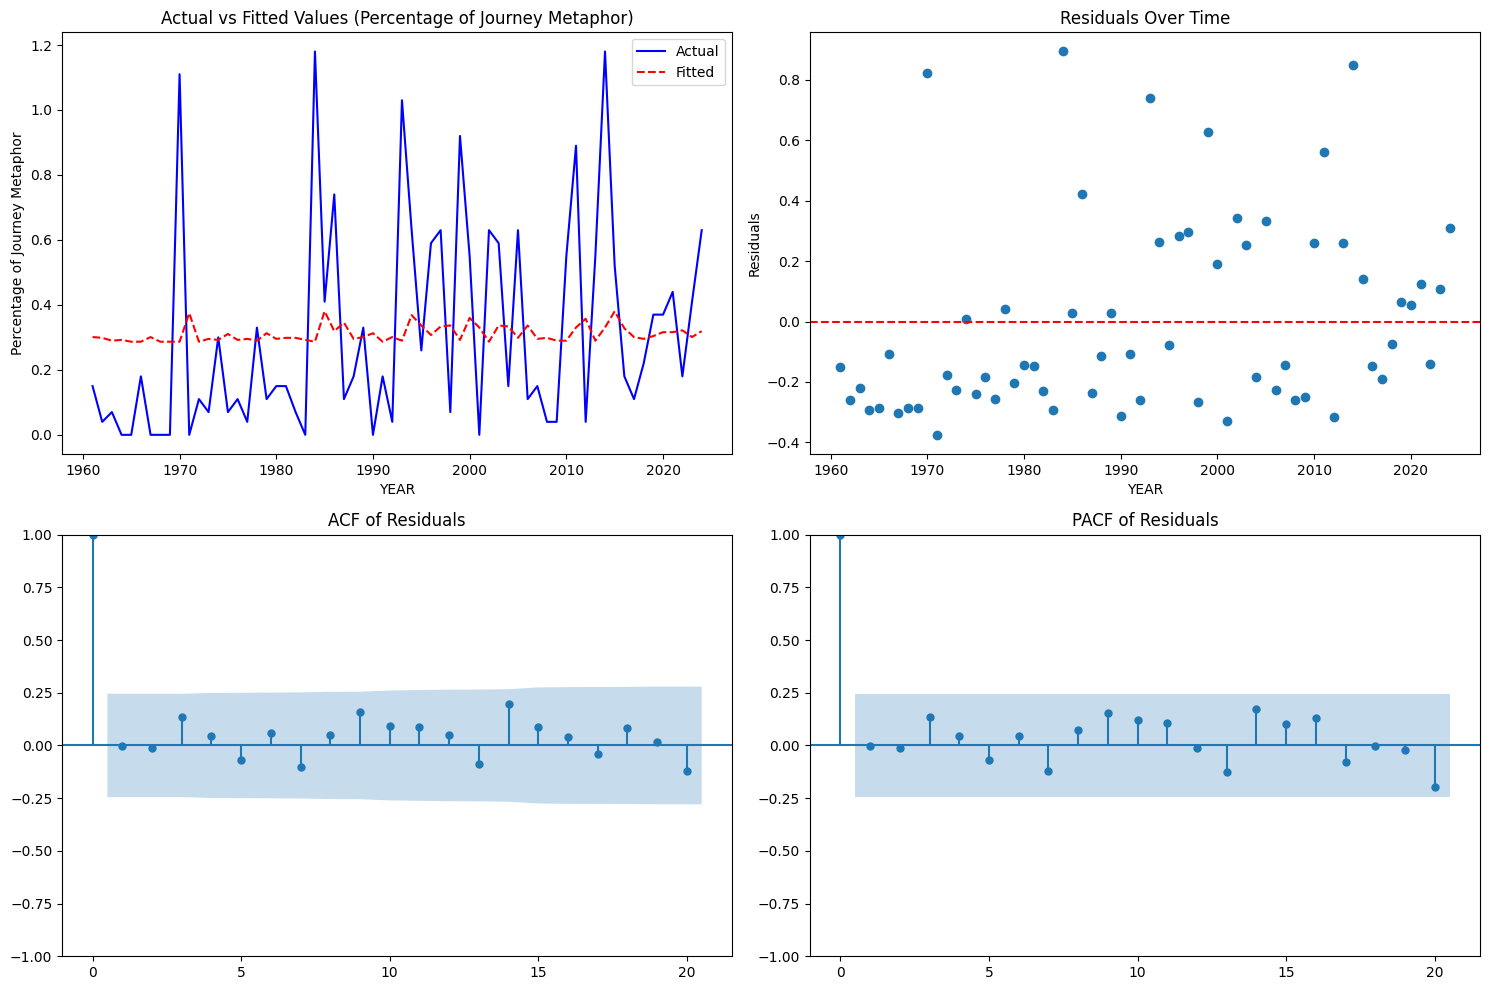

<Figure size 600x600 with 0 Axes>

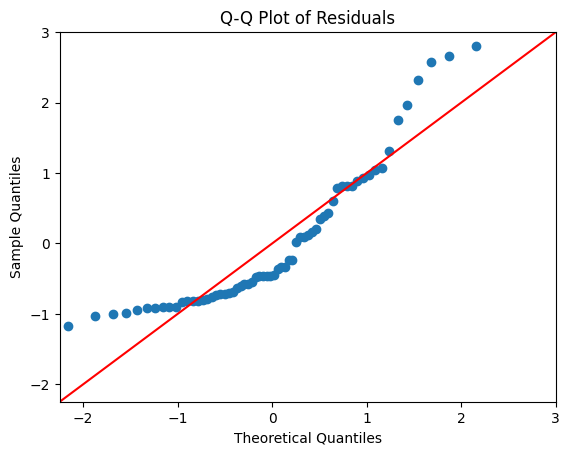

In [ ]:
#correct time series for JOURNEY (NATIONHOOD) Latest August, 2025 (CHAPTER Four)


import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    # The 'YEAR' column now ranges from 1960 to 2024.
    'YEAR': range(1960, 2025),
    # The 'PERCENTAGE OF JOURNEY METAPHOR' column contains the new metaphor usage values.
    'PERCENTAGE OF JOURNEY METAPHOR': [
        0.18, 0.15, 0.04, 0.07, 0.00, 0.00, 0.18, 0.00, 0.00, 0.00,
        1.11, 0.00, 0.11, 0.07, 0.30, 0.07, 0.11, 0.04, 0.33, 0.11,
        0.15, 0.15, 0.07, 0.00, 1.18, 0.41, 0.74, 0.11, 0.18, 0.33,
        0.00, 0.18, 0.04, 1.03, 0.63, 0.26, 0.59, 0.63, 0.07, 0.92,
        0.55, 0.00, 0.63, 0.59, 0.15, 0.63, 0.11, 0.15, 0.04, 0.04,
        0.55, 0.89, 0.04, 0.55, 1.18, 0.52, 0.18, 0.11, 0.22, 0.37,
        0.37, 0.44, 0.18, 0.41, 0.63
    ]
}

df = pd.DataFrame(data)

# Create lagged variable
# The lagged variable is now based on 'PERCENTAGE OF JOURNEY METAPHOR'.
df['Lag1'] = df['PERCENTAGE OF JOURNEY METAPHOR'].shift(1)

# Drop the first row (NA due to lagging)
df = df.dropna()

# Fit AR(1) model
# The dependent variable is now 'PERCENTAGE OF JOURNEY METAPHOR'.
X = sm.add_constant(df['Lag1'])  # Add intercept
model = sm.OLS(df['PERCENTAGE OF JOURNEY METAPHOR'], X)
results = model.fit()

# Model summary
print("="*50)
print("AR(1) MODEL RESULTS")
print("="*50)
print(results.summary())
print("\n")

# Residual diagnostics
residuals = results.resid

# Normality test (Shapiro-Wilk)
shapiro_test = stats.shapiro(residuals)
print("="*50)
print("RESIDUAL NORMALITY TEST")
print("="*50)
print(f"Shapiro-Wilk test: W = {shapiro_test[0]:.3f}, p = {shapiro_test[1]:.3f}")
if shapiro_test[1] > 0.05:
    print("Residuals are normally distributed (p > 0.05)")
else:
    print("Residuals are NOT normally distributed (p ≤ 0.05)")
print("\n")

# Autocorrelation tests
print("="*50)
print("RESIDUAL AUTOCORRELATION TESTS")
print("="*50)
print("Ljung-Box Test (Q-statistic):")
lb_test = acorr_ljungbox(residuals, lags=[5, 10], return_df=True)
print(lb_test)
print("\n")

# Visualization
plt.figure(figsize=(15, 10))

# 1. Time series plot
# Plotting 'YEAR' against 'PERCENTAGE OF JOURNEY METAPHOR' and fitted values.
plt.subplot(2, 2, 1)
plt.plot(df['YEAR'], df['PERCENTAGE OF JOURNEY METAPHOR'], 'b-', label='Actual')
plt.plot(df['YEAR'], results.fittedvalues, 'r--', label='Fitted')
plt.title('Actual vs Fitted Values (Percentage of Journey Metaphor)')
plt.xlabel('YEAR')
plt.ylabel('Percentage of Journey Metaphor')
plt.legend()

# 2. Residual plot
# Plotting residuals against 'YEAR'.
plt.subplot(2, 2, 2)
plt.scatter(df['YEAR'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('YEAR')
plt.ylabel('Residuals')

# 3. ACF plot
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF of Residuals')

# 4. PACF plot
plt.subplot(2, 2, 4)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

# Additional diagnostic: QQ plot
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

AR(1) MODEL RESULTS
                                  OLS Regression Results                                 
Dep. Variable:     PERCENTAGE OF FAMILY METAPHOR   R-squared:                       0.080
Model:                                       OLS   Adj. R-squared:                  0.065
Method:                            Least Squares   F-statistic:                     5.409
Date:                           Sat, 16 Aug 2025   Prob (F-statistic):             0.0233
Time:                                   07:30:36   Log-Likelihood:                0.24580
No. Observations:                             64   AIC:                             3.508
Df Residuals:                                 62   BIC:                             7.826
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

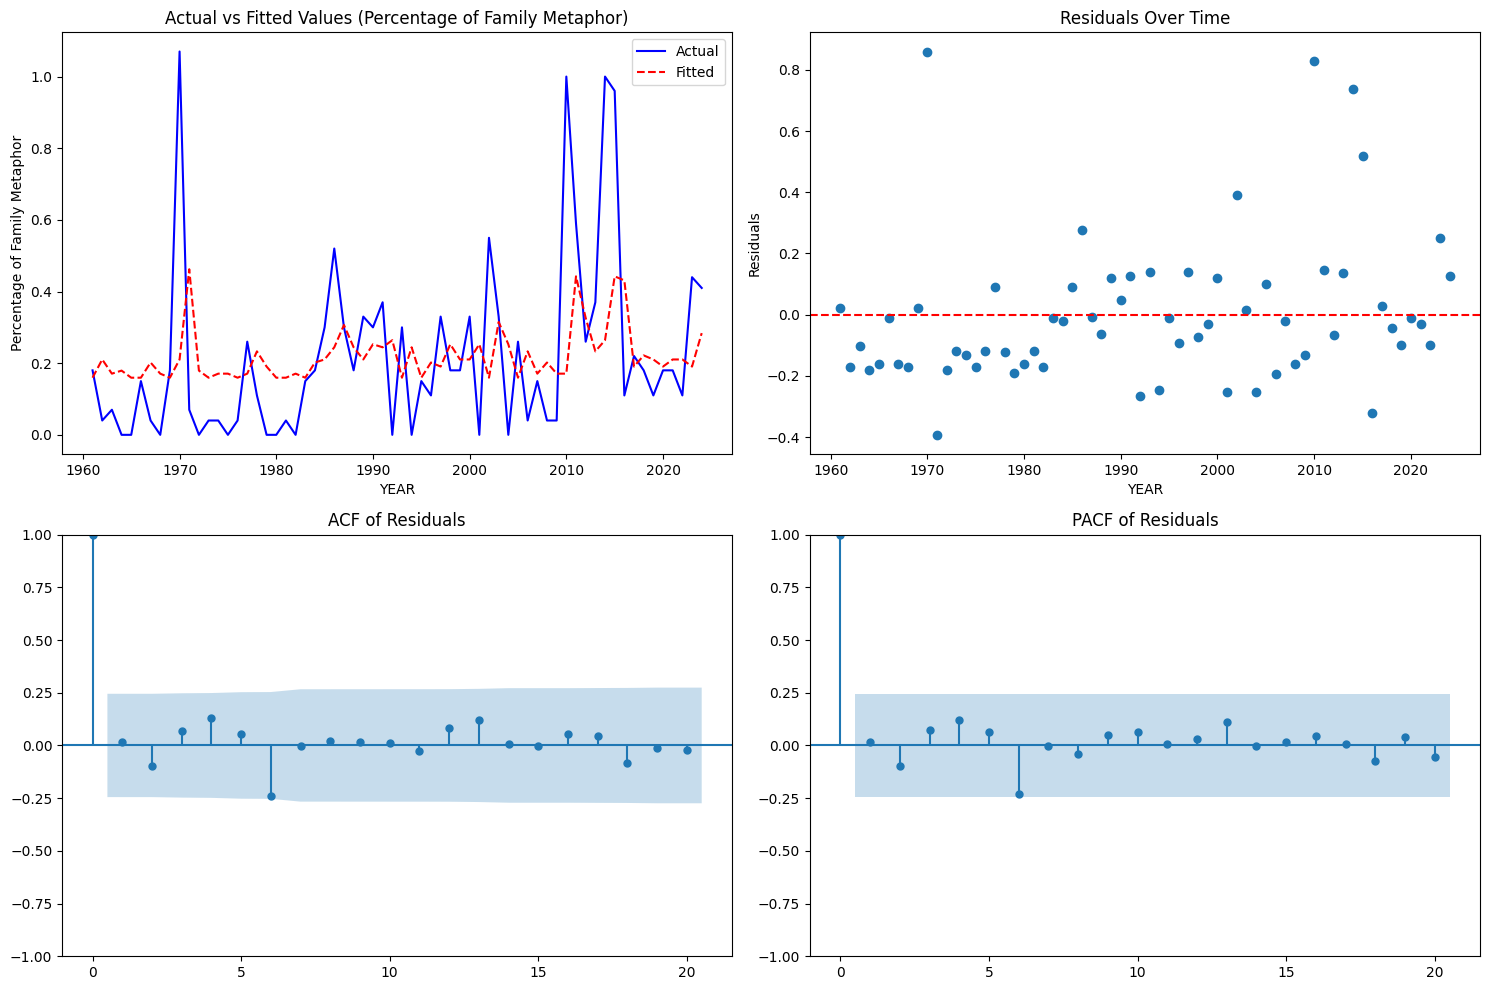

<Figure size 600x600 with 0 Axes>

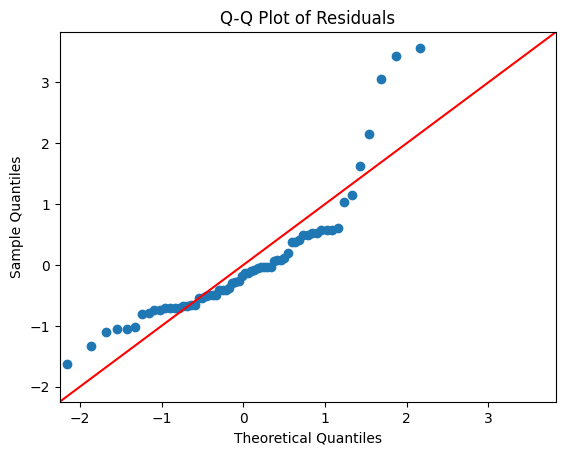

In [ ]:
#correct time series for FAMILY (NATIONHOOD) August, 2025 (CHAPTER four)

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    # Updated 'YEAR' column
    'YEAR': range(1960, 2025),
    # New 'PERCENTAGE OF FAMILY METAPHOR' data
    'PERCENTAGE OF FAMILY METAPHOR': [
        0.00, 0.18, 0.04, 0.07, 0.00, 0.00, 0.15, 0.04, 0.00, 0.18,
        1.07, 0.07, 0.00, 0.04, 0.04, 0.00, 0.04, 0.26, 0.11, 0.00,
        0.00, 0.04, 0.00, 0.15, 0.18, 0.30, 0.52, 0.30, 0.18, 0.33,
        0.30, 0.37, 0.00, 0.30, 0.00, 0.15, 0.11, 0.33, 0.18, 0.18,
        0.33, 0.00, 0.55, 0.33, 0.00, 0.26, 0.04, 0.15, 0.04, 0.04,
        1.00, 0.59, 0.26, 0.37, 1.00, 0.96, 0.11, 0.22, 0.18, 0.11,
        0.18, 0.18, 0.11, 0.44, 0.41
    ]
}

df = pd.DataFrame(data)

# Create lagged variable using the new metaphor column
df['Lag1'] = df['PERCENTAGE OF FAMILY METAPHOR'].shift(1)

# Drop the first row (NA due to lagging)
df = df.dropna()

# Fit AR(1) model using the new metaphor column
X = sm.add_constant(df['Lag1'])  # Add intercept
model = sm.OLS(df['PERCENTAGE OF FAMILY METAPHOR'], X)
results = model.fit()

# Model summary
print("="*50)
print("AR(1) MODEL RESULTS")
print("="*50)
print(results.summary())
print("\n")

# Residual diagnostics
residuals = results.resid

# Normality test (Shapiro-Wilk)
shapiro_test = stats.shapiro(residuals)
print("="*50)
print("RESIDUAL NORMALITY TEST")
print("="*50)
print(f"Shapiro-Wilk test: W = {shapiro_test[0]:.3f}, p = {shapiro_test[1]:.3f}")
if shapiro_test[1] > 0.05:
    print("Residuals are normally distributed (p > 0.05)")
else:
    print("Residuals are NOT normally distributed (p ≤ 0.05)")
print("\n")

# Autocorrelation tests
print("="*50)
print("RESIDUAL AUTOCORRELATION TESTS")
print("="*50)
print("Ljung-Box Test (Q-statistic):")
lb_test = acorr_ljungbox(residuals, lags=[5, 10], return_df=True)
print(lb_test)
print("\n")

# Visualization
plt.figure(figsize=(15, 10))

# 1. Time series plot - Updated column names and labels
plt.subplot(2, 2, 1)
plt.plot(df['YEAR'], df['PERCENTAGE OF FAMILY METAPHOR'], 'b-', label='Actual')
plt.plot(df['YEAR'], results.fittedvalues, 'r--', label='Fitted')
plt.title('Actual vs Fitted Values (Percentage of Family Metaphor)')
plt.xlabel('YEAR')
plt.ylabel('Percentage of Family Metaphor')
plt.legend()

# 2. Residual plot - Updated column names and labels
plt.subplot(2, 2, 2)
plt.scatter(df['YEAR'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('YEAR')
plt.ylabel('Residuals')

# 3. ACF plot
plt.subplot(2, 2, 3)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF of Residuals')

# 4. PACF plot
plt.subplot(2, 2, 4)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

# Additional diagnostic: QQ plot
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

--- STEP 1: Loading and Preparing Data ---
Data loaded successfully. Index converted to DatetimeIndex.
Time series runs from 1960 to 2024.

--- STEP 2: Exploratory Analysis & Pre-Modeling Checks ---
Saved high-quality plot to 'figure_1_time_series_plot.png'


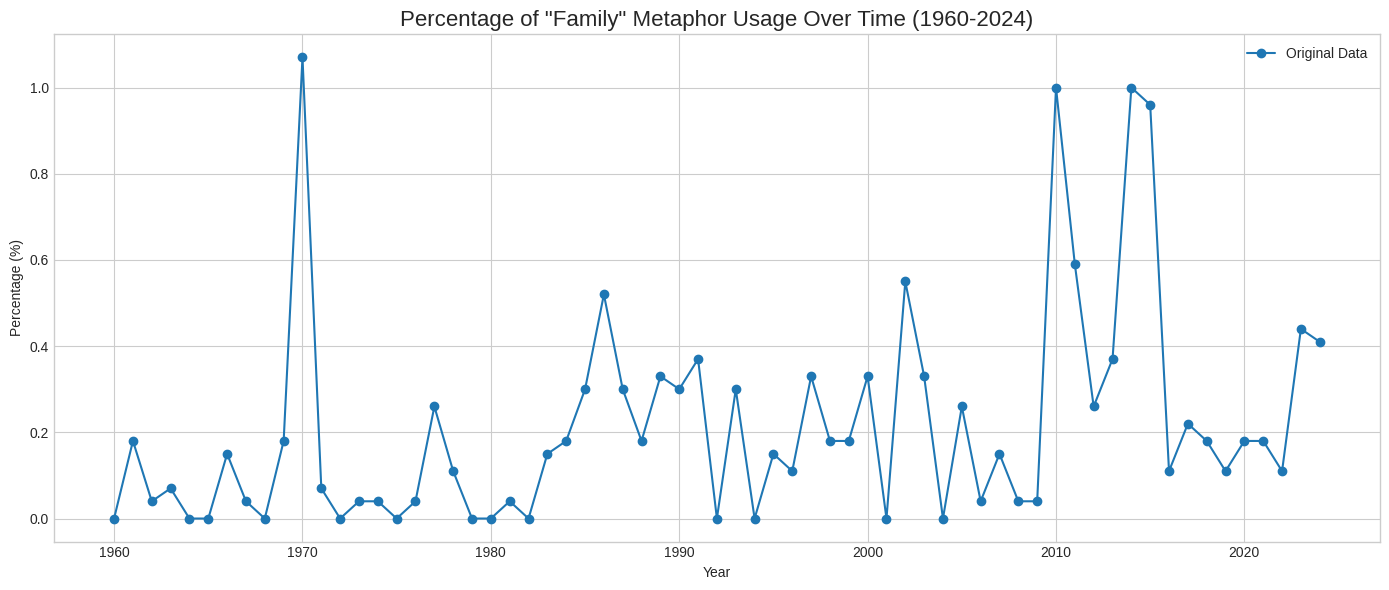


--- 2a. Augmented Dickey-Fuller Test for Stationarity ---
ADF Statistic: -5.8943
p-value: 0.0000
Conclusion: The series is STATIONARY (p <= 0.05). We can proceed with ARMA modeling.


--- 2b. ACF and PACF Plots for Model Identification ---
Saved high-quality ACF/PACF plot to 'figure_2_acf_pacf_plots.png'


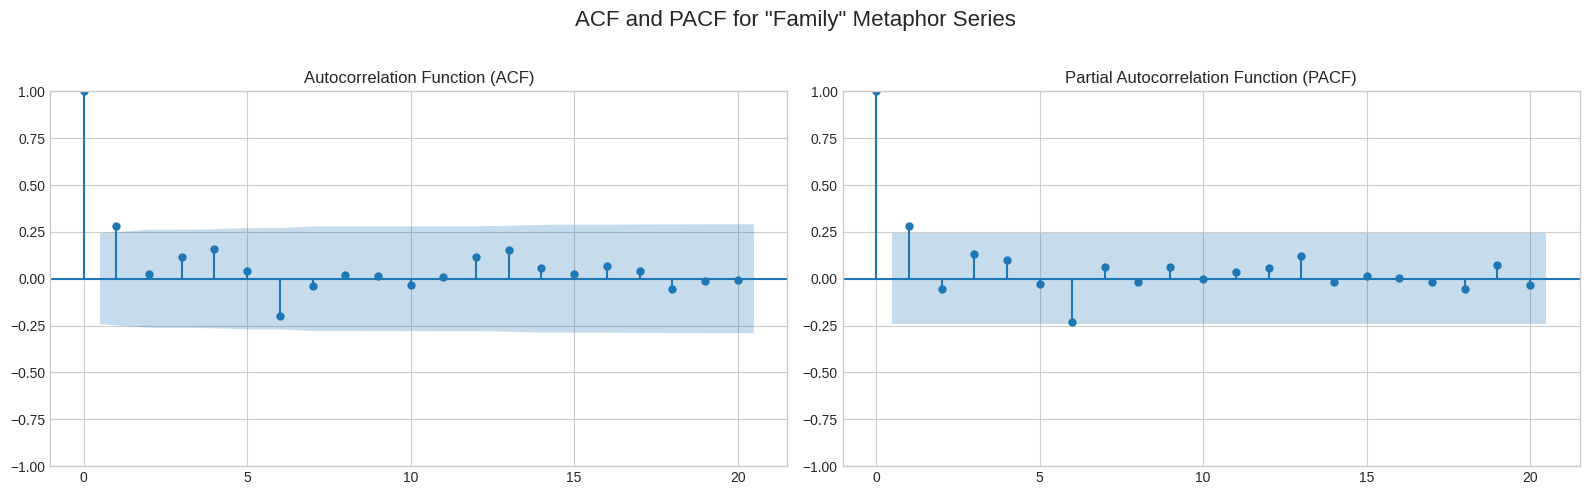

Interpretation: The PACF plot shows a significant spike at lag 1 and then cuts off abruptly.
This pattern is a strong indicator that an AR(1) model is an appropriate choice.

--- STEP 3: Fitting AR(1) Model on Full Dataset ---
                                  OLS Regression Results                                 
Dep. Variable:     PERCENTAGE OF FAMILY METAPHOR   R-squared:                       0.080
Model:                                       OLS   Adj. R-squared:                  0.065
Method:                            Least Squares   F-statistic:                     5.409
Date:                           Sat, 15 Nov 2025   Prob (F-statistic):             0.0233
Time:                                   09:59:27   Log-Likelihood:                0.24580
No. Observations:                             64   AIC:                             3.508
Df Residuals:                                 62   BIC:                             7.826
Df Model:                                      1     

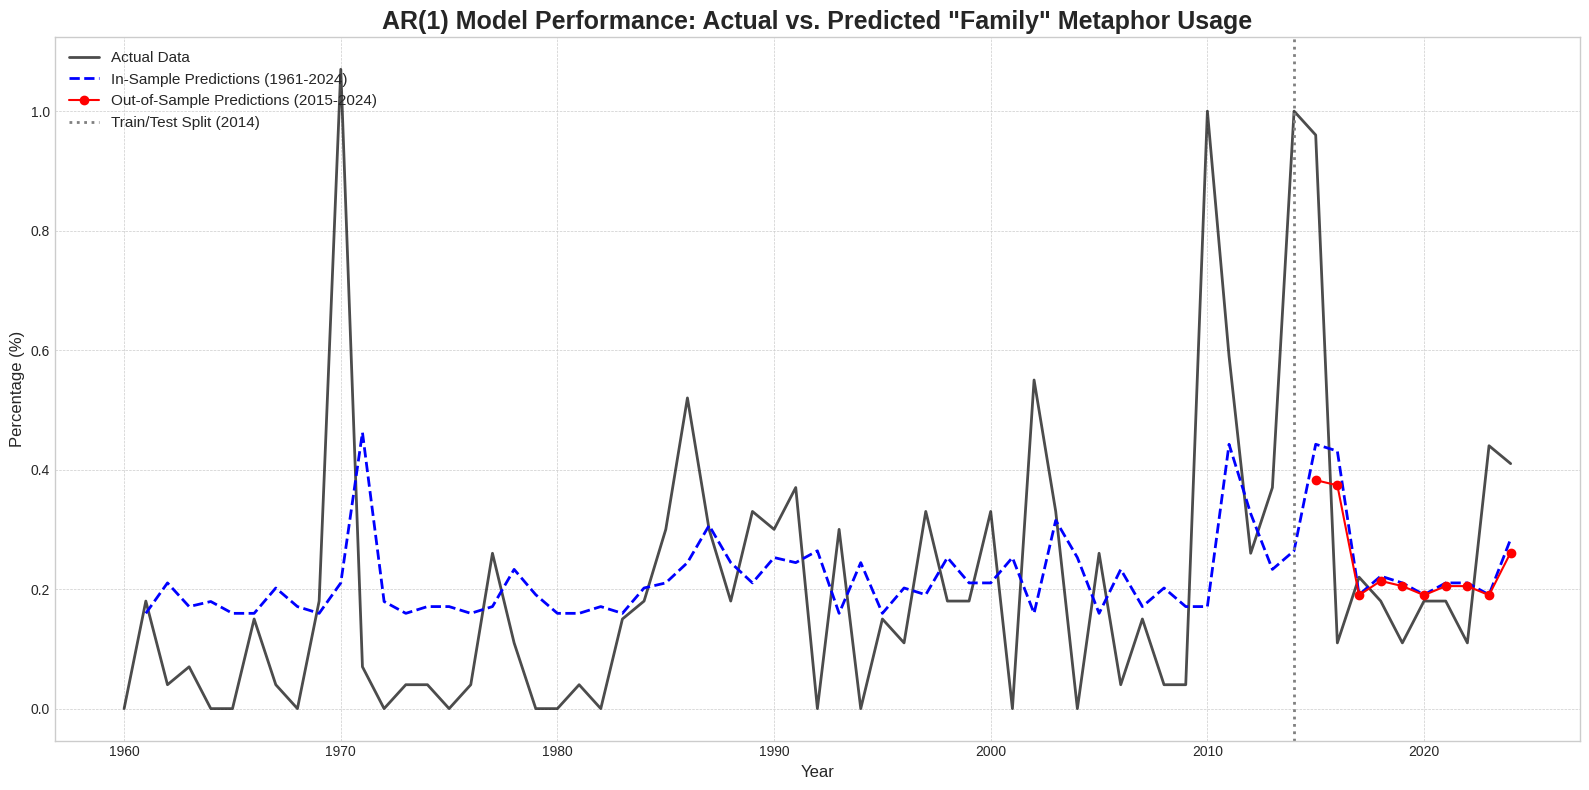


--- Analysis Complete ---


In [1]:
## ==============================================================================
# COMPREHENSIVE TIME SERIES ANALYSIS OF 'FAMILY (NATIONHOOD)' METAPHOR USAGE
#
# Author: [Chigbu]
# Date: November 2025
# For: Chapter Four, based on Dennis' review
#
# This script performs a complete AR(1) analysis, including:
# 1. Data Preparation
# 2. Stationarity Testing (ADF) and Model Identification (ACF/PACF)
# 3. Full Model Fitting and Summary
# 4. In-Sample and Out-of-Sample Validation
# 5. Final Visualization of Model Performance
# ==============================================================================

# --- Import Necessary Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# --- STEP 1: DATA LOADING AND PREPARATION ---
print("--- STEP 1: Loading and Preparing Data ---")

# The provided time series data
data = {
    'YEAR': range(1960, 2025),
    'PERCENTAGE OF FAMILY METAPHOR': [
        0.00, 0.18, 0.04, 0.07, 0.00, 0.00, 0.15, 0.04, 0.00, 0.18,
        1.07, 0.07, 0.00, 0.04, 0.04, 0.00, 0.04, 0.26, 0.11, 0.00,
        0.00, 0.04, 0.00, 0.15, 0.18, 0.30, 0.52, 0.30, 0.18, 0.33,
        0.30, 0.37, 0.00, 0.30, 0.00, 0.15, 0.11, 0.33, 0.18, 0.18,
        0.33, 0.00, 0.55, 0.33, 0.00, 0.26, 0.04, 0.15, 0.04, 0.04,
        1.00, 0.59, 0.26, 0.37, 1.00, 0.96, 0.11, 0.22, 0.18, 0.11,
        0.18, 0.18, 0.11, 0.44, 0.41
    ]
}
# Create DataFrame and set the YEAR as a proper DatetimeIndex
df = pd.DataFrame(data)
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
df = df.set_index('YEAR')

series = df['PERCENTAGE OF FAMILY METAPHOR']
print("Data loaded successfully. Index converted to DatetimeIndex.")
print(f"Time series runs from {df.index.min().year} to {df.index.max().year}.\n")


# --- STEP 2: EXPLORATORY ANALYSIS & PRE-MODELING CHECKS ---
print("--- STEP 2: Exploratory Analysis & Pre-Modeling Checks ---")

# 2a. Visualize the Time Series
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(series.index, series, marker='o', linestyle='-', label='Original Data')
ax.set_title('Percentage of "Family" Metaphor Usage Over Time (1960-2024)', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage (%)')
ax.legend()
plt.tight_layout()

# --- MODIFICATION FOR HD OUTPUT ---
# Save the figure to a file with high resolution (300 DPI) before showing it.
plt.savefig('figure_1_time_series_plot.png', dpi=300, bbox_inches='tight')
print("Saved high-quality plot to 'figure_1_time_series_plot.png'")
# ---------------------------------

plt.show()

# 2b. Perform Augmented Dickey-Fuller (ADF) Test for Stationarity
print("\n--- 2a. Augmented Dickey-Fuller Test for Stationarity ---")
adf_result = adfuller(series.dropna())
p_value = adf_result[1]
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {p_value:.4f}')
if p_value <= 0.05:
    print("Conclusion: The series is STATIONARY (p <= 0.05). We can proceed with ARMA modeling.\n")
else:
    print("Conclusion: The series is NON-STATIONARY (p > 0.05). Differencing would be required.\n")

# 2c. Plot ACF and PACF to identify model order (p, q)
print("\n--- 2b. ACF and PACF Plots for Model Identification ---")
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(series.dropna(), lags=20, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(series.dropna(), lags=20, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.suptitle('ACF and PACF for "Family" Metaphor Series', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# --- MODIFICATION FOR HD OUTPUT ---
# Save the ACF/PACF figure with high resolution
plt.savefig('figure_2_acf_pacf_plots.png', dpi=300, bbox_inches='tight')
print("Saved high-quality ACF/PACF plot to 'figure_2_acf_pacf_plots.png'")
# ----------------------------------

plt.show()
print("Interpretation: The PACF plot shows a significant spike at lag 1 and then cuts off abruptly.")
print("This pattern is a strong indicator that an AR(1) model is an appropriate choice.\n")


# --- STEP 3: FIT AR(1) MODEL ON FULL DATASET ---
print("--- STEP 3: Fitting AR(1) Model on Full Dataset ---")

# Prepare data for OLS: create lagged variable and add a constant
df_model = df.copy()
df_model['Lag1'] = df_model['PERCENTAGE OF FAMILY METAPHOR'].shift(1)
df_model = df_model.dropna() # Drop the first row with NaN from shifting

# Define dependent (y) and independent (X) variables
y = df_model['PERCENTAGE OF FAMILY METAPHOR']
X = sm.add_constant(df_model['Lag1']) # Add a constant for the intercept

# Fit the Ordinary Least Squares (OLS) model, which is equivalent to AR(1) here
full_model_results = sm.OLS(y, X).fit()

# Print the detailed model summary
print(full_model_results.summary())
print("\n")


# --- STEP 4: MODEL VALIDATION ---
print("--- STEP 4: Model Validation ---")

# 4a. In-Sample Predictive Accuracy (how well the model fits the data it was trained on)
print("\n--- 4a. In-Sample Predictive Accuracy ---")
in_sample_predictions = full_model_results.predict(X)
in_sample_mae = mean_absolute_error(y, in_sample_predictions)
in_sample_rmse = root_mean_squared_error(y, in_sample_predictions)

print(f"In-Sample Mean Absolute Error (MAE): {in_sample_mae:.4f}")
print(f"In-Sample Root Mean Squared Error (RMSE): {in_sample_rmse:.4f}")
print("Interpretation: On average, the model's predictions for the data it was trained on are off by ~0.23 percentage points.\n")

# 4b. Out-of-Sample Predictive Accuracy (a more robust test of predictive power)
print("\n--- 4b. Out-of-Sample Predictive Accuracy (Hold-Out Validation) ---")

# Split the data: Train on data up to 2014, test on the last 10 years (2015-2024)
hold_out_years = 10
train_end_year = df.index.max().year - hold_out_years
train_end_date = pd.to_datetime(str(train_end_year))

train_y = y[y.index <= train_end_date]
train_X = X[X.index <= train_end_date]
test_y = y[y.index > train_end_date]
test_X = X[X.index > train_end_date]

# Fit a new model ONLY on the training data
train_model_results = sm.OLS(train_y, train_X).fit()

# Predict on the unseen hold-out (test) set
out_of_sample_predictions = train_model_results.predict(test_X)

# Calculate error metrics for the hold-out set
out_of_sample_mae = mean_absolute_error(test_y, out_of_sample_predictions)
out_of_sample_rmse = root_mean_squared_error(test_y, out_of_sample_predictions)

print(f"Training Period: 1961 - {train_end_year}")
print(f"Hold-Out (Test) Period: {train_end_year + 1} - {df.index.max().year}")
print(f"\nOut-of-Sample Mean Absolute Error (MAE): {out_of_sample_mae:.4f}")
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse:.4f}\n")

# Create a comparison dataframe for the hold-out set
comparison_df = pd.DataFrame({
    'Actual': test_y,
    'Predicted': out_of_sample_predictions,
    'Error': test_y - out_of_sample_predictions
})
print("--- Comparison of Actual vs. Predicted Values (Hold-Out Set) ---")
print(comparison_df.round(4))
print("\n")


# --- STEP 5: COMPREHENSIVE VISUALIZATION OF MODEL FIT ---
print("--- STEP 5: Generating Final Performance Visualization ---")

fig, ax = plt.subplots(figsize=(16, 8))

# Plot the original series
ax.plot(series.index, series, 'k-', label='Actual Data', linewidth=2, alpha=0.7)

# Plot in-sample predictions
ax.plot(in_sample_predictions.index, in_sample_predictions, 'b--', label='In-Sample Predictions (1961-2024)', linewidth=2)

# Plot out-of-sample predictions
ax.plot(out_of_sample_predictions.index, out_of_sample_predictions, 'r-', marker='o', markersize=6, label=f'Out-of-Sample Predictions ({train_end_year + 1}-2024)')

# Add a vertical line to show the train/test split
ax.axvline(x=train_end_date, color='gray', linestyle=':', linewidth=2, label=f'Train/Test Split ({train_end_year})')

# Formatting the plot
ax.set_title('AR(1) Model Performance: Actual vs. Predicted "Family" Metaphor Usage', fontsize=18, weight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()

# --- MODIFICATION FOR HD OUTPUT ---
# Save the final comprehensive figure with high resolution
plt.savefig('figure_3_model_performance.png', dpi=300, bbox_inches='tight')
print("Saved high-quality model performance plot to 'figure_3_model_performance.png'")
# ----------------------------------

plt.show()

print("\n--- Analysis Complete ---")